# Unit 5 - Financial Planning

In [15]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [16]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [17]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [18]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [19]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']
print(f"BTC price is {btc_price}")

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
print(f"ETH price is {eth_price}")

BTC price is 23104.0
ETH price is 1585.18


In [20]:
# Compute current value of my crpto
my_btc_value = (my_btc) * (btc_price)
my_eth_value = (my_eth) * (eth_price)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $27724.80
The current value of your 5.3 ETH is $8401.45


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [21]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [22]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [23]:
# Format current date as ISO format
today = pd.Timestamp("2023-01-27", tz="America/New_York").isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG'])

# Preview DataFrame
df_portfolio

SPY                                    \
                              open    high     low   close    volume   
timestamp                                                              
2023-01-27 05:00:00+00:00  403.655  408.16  403.44  405.68  68346180   

                                                     AGG                 \
                          trade_count        vwap   open    high    low   
timestamp                                                                 
2023-01-27 05:00:00+00:00      496480  405.790293  99.96  100.14  99.91   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2023-01-27 05:00:00+00:00  100.08  5123098       18192  100.061411

In [24]:
# Pick AGG and SPY close prices
spy_close_price = float(df_portfolio["SPY"]["close"])
agg_close_price = float(df_portfolio["AGG"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $100.08
Current SPY closing price: $405.68


In [25]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20284.00
The current value of your 200 AGG shares is $20016.00


### Savings Health Analysis

In [26]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_eth_value + my_btc_value
shares = my_agg_value + my_spy_value
savings = [crypto, shares]

# Create savings DataFrame
df_savings = pd.DataFrame(
    savings,
    columns=(['amount']),
    index=(['crypto','shares'])
)

# Display savings DataFrame
display(df_savings)

,amount
crypto,36126.254
shares,40300.000


In [1]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title='Composition of Personal Savings', radius = 1.4)

NameError: name 'df_savings' is not defined

In [28]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares
print(f"You current have ${total_savings}")

# Validate saving health
print(f"You need ${emergency_fund} in your savings")

if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
else:
    print(f"Looks like you better get back to work!")

You current have $76426.254
You need $36000 in your savings
Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [29]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-01-27', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-01-27', tz='America/New_York').isoformat()

In [30]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ['SPY','AGG']

timeframe = '1Day'

df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker['symbol'] == 'AGG'].drop('symbol', axis = 1)
SPY = df_ticker[df_ticker['symbol'] == 'SPY'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                     \
                             open     high     low   close    volume   
timestamp                                                              
2018-01-29 05:00:00+00:00  108.14  108.250  108.02  108.18   3974898   
2018-01-30 05:00:00+00:00  108.12  108.120  107.92  108.01   3659538   
2018-01-31 05:00:00+00:00  108.20  108.210  107.88  108.10   8066895   
2018-02-01 05:00:00+00:00  107.75  107.825  107.48  107.52  10330443   
2018-02-02 05:00:00+00:00  107.25  107.345  107.10  107.20   4779312   

                                                      SPY                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2018-01-29 05:00:00+00:00       17162  108.140754  285.93  286.430  284.50   
2018-01-30 05:00:00+00:00       14454  108.010293  282.59  284.736  281.22   
2018-01-31 05:00:00+00:00       29280  108.033072  282.73  283.300  280.68   
2018-02-01 05:00:00+00:00       26477  107.695566  281.08  283.060  280.68   
2018-02-02 05:00:00+00:00       17781  107.197964  280.08  280.230  275.41   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2018-01-29 05:00:00+00:00  284.64   90206637      286719  285.443701  
2018-01-30 05:00:00+00:00  281.63  132075557      427207  282.425628  
2018-01-31 05:00:00+00:00  281.91  118954475      363005  281.967347  
2018-02-01 05:00:00+00:00  281.68   90622947      304909  281.766220  
2018-02-02 05:00:00+00:00  275.51  175825647      548623  277.434737

In [31]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yr = MCSimulation(
    portfolio_data= df_stock_data,
    weights= [.40,.60],
    num_simulation= 500,
    num_trading_days= 252*30
)

In [32]:
# Printing the simulation input data
MC_30yr.portfolio_data.head()

AGG                                     \
                             open     high     low   close    volume   
timestamp                                                              
2018-01-29 05:00:00+00:00  108.14  108.250  108.02  108.18   3974898   
2018-01-30 05:00:00+00:00  108.12  108.120  107.92  108.01   3659538   
2018-01-31 05:00:00+00:00  108.20  108.210  107.88  108.10   8066895   
2018-02-01 05:00:00+00:00  107.75  107.825  107.48  107.52  10330443   
2018-02-02 05:00:00+00:00  107.25  107.345  107.10  107.20   4779312   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-01-29 05:00:00+00:00       17162  108.140754          NaN  285.93   
2018-01-30 05:00:00+00:00       14454  108.010293    -0.001571  282.59   
2018-01-31 05:00:00+00:00       29280  108.033072     0.000833  282.73   
2018-02-01 05:00:00+00:00       26477  107.695566    -0.005365  281.08   
2018-02-02 05:00:00+00:00       17781  107.197964    -0.002976  280.08   

                                                                           \
                              high     low   close     volume trade_count   
timestamp                                                                   
2018-01-29 05:00:00+00:00  286.430  284.50  284.64   90206637      286719   
2018-01-30 05:00:00+00:00  284.736  281.22  281.63  132075557      427207   
2018-01-31 05:00:00+00:00  283.300  280.68  281.91  118954475      363005   
2018-02-01 05:00:00+00:00  283.060  280.68  281.68   90622947      304909   
2018-02-02 05:00:00+00:00  280.230  275.41  275.51  175825647      548623   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-01-29 05:00:00+00:00  285.443701          NaN  
2018-01-30 05:00:00+00:00  282.425628    -0.010575  
2018-01-31 05:00:00+00:00  281.967347     0.000994  
2018-02-01 05:00:00+00:00  281.766220    -0.000816  
2018-02-02 05:00:00+00:00  277.434737    -0.021904

In [47]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Elias\Desktop\Bootcamp\Challenge-5-API\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993744,0.996224,0.981848,0.988881,0.996109,0.988022,0.997688,0.999961,1.011435,1.003132,...,0.991734,0.994264,0.992007,0.985324,0.997584,0.999378,1.004156,0.980799,1.002893,0.990461
2,0.986446,0.994185,0.979409,0.981628,0.992349,0.984410,0.991164,1.002445,1.004653,0.988722,...,0.995441,1.002571,0.993090,0.981335,0.995783,0.992066,1.005477,0.979574,0.998070,0.984653
3,0.966571,0.994030,0.988152,1.004076,1.005571,0.988799,1.000304,1.001115,1.000150,0.997765,...,0.987689,1.001809,0.989779,0.994886,1.003554,1.001686,1.006797,0.984658,0.982341,0.975376
4,0.962302,0.987561,0.988119,0.989366,1.011436,0.994069,1.001971,1.014480,1.002170,0.998122,...,0.990744,1.002699,0.993074,0.988544,1.010096,0.998360,0.996254,0.991582,0.973314,0.961404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.936635,2.354411,4.444513,2.619871,2.603930,6.146788,7.732062,1.992199,7.630664,5.115004,...,1.552612,1.740700,2.559218,8.102598,7.740306,5.894565,9.283246,2.724697,3.779137,5.317537
7557,3.931792,2.353543,4.403475,2.624967,2.611722,6.071614,7.740958,2.005078,7.572022,5.073475,...,1.540687,1.752083,2.583937,8.067106,7.773514,5.826616,9.386767,2.693976,3.800860,5.277525
7558,3.930591,2.363052,4.410328,2.638716,2.638132,6.224511,7.691886,1.983596,7.516109,4.997680,...,1.549159,1.746981,2.612331,8.115880,7.756988,5.747325,9.446708,2.700265,3.807752,5.259715
7559,3.914267,2.368763,4.411978,2.622472,2.655985,6.325567,7.690367,1.973552,7.496505,5.017518,...,1.555647,1.778019,2.595166,8.144010,7.828682,5.696072,9.508025,2.686206,3.821036,5.294257


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

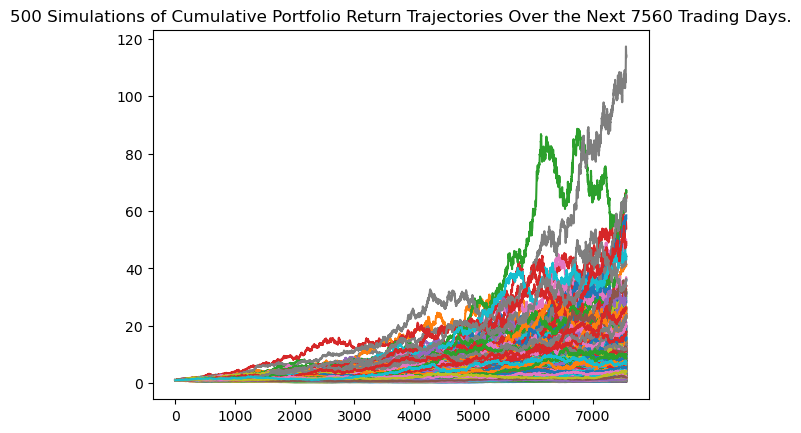

In [ ]:
# Plot simulation outcomes
MC_30yr.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

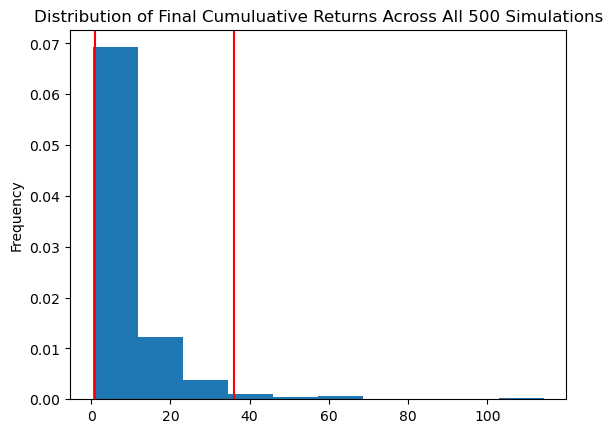

In [ ]:
# Plot probability distribution and confidence intervals
MC_30yr.plot_distribution()

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_30yr_stats = MC_30yr.summarize_cumulative_return()

# Print summary statistics
print(MC_30yr_stats)

count           500.000000
mean              8.782481
std              10.562801
min               0.430096
25%               2.949657
50%               5.622468
75%              10.416052
max             114.212044
95% CI Lower      1.038117
95% CI Upper     35.994450
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_30yr_stats[8]*initial_investment,2)
ci_upper = round(MC_30yr_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within the range of $20762.34 and $719888.99


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_30yr_stats[8]*initial_investment,2)
ci_upper = round(MC_30yr_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $31143.51 and $1079833.49


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr = MCSimulation(
    portfolio_data= df_stock_data,
    weights= [.40,.60],
    num_simulation= 500,
    num_trading_days= 252*5
)

In [35]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Elias\Desktop\Bootcamp\Challenge-5-API\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997909,0.998127,0.990758,0.989378,1.001181,0.993084,1.012583,0.994470,0.978560,0.995921,...,0.992772,0.995685,1.008275,1.001441,1.009398,0.990356,0.999696,1.007722,1.000459,1.002314
2,1.006578,1.006896,0.989154,0.998648,0.997684,1.001524,1.044744,1.003206,0.972948,1.004572,...,1.002177,0.996012,1.008904,0.999861,0.998457,0.979826,0.992973,0.998654,1.018856,1.000513
3,1.019760,0.997941,0.975521,1.003093,0.997169,1.009945,1.035520,1.005164,0.976325,1.001163,...,0.999459,1.010020,1.000947,0.998170,0.997751,0.989325,1.006162,0.995023,1.019972,0.997384
4,1.009709,0.998337,0.982540,1.004974,0.995244,1.013152,1.033257,1.000517,0.993857,1.005482,...,1.005605,1.007662,1.005169,0.998944,1.002343,0.986064,1.016290,1.003110,1.036802,0.989474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.343012,1.190646,1.182112,1.458784,1.102898,1.273646,1.590900,0.935102,1.132645,1.200955,...,0.998889,1.201590,1.138013,1.354672,1.517060,0.811630,1.052818,1.521732,0.957774,0.798547
1257,1.338657,1.199482,1.182264,1.463662,1.092493,1.277902,1.585130,0.928280,1.128433,1.211148,...,0.991240,1.193507,1.133244,1.357493,1.518106,0.799476,1.059074,1.537667,0.953227,0.818340
1258,1.340874,1.186998,1.194198,1.483317,1.102158,1.281289,1.571393,0.931546,1.124476,1.225059,...,0.975332,1.213734,1.146307,1.359221,1.514403,0.797659,1.048252,1.545862,0.956877,0.817954
1259,1.348215,1.195674,1.194066,1.469664,1.088748,1.285650,1.555597,0.926626,1.123877,1.216903,...,0.973816,1.222154,1.144147,1.361685,1.511292,0.797566,1.049864,1.544095,0.958918,0.823790


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

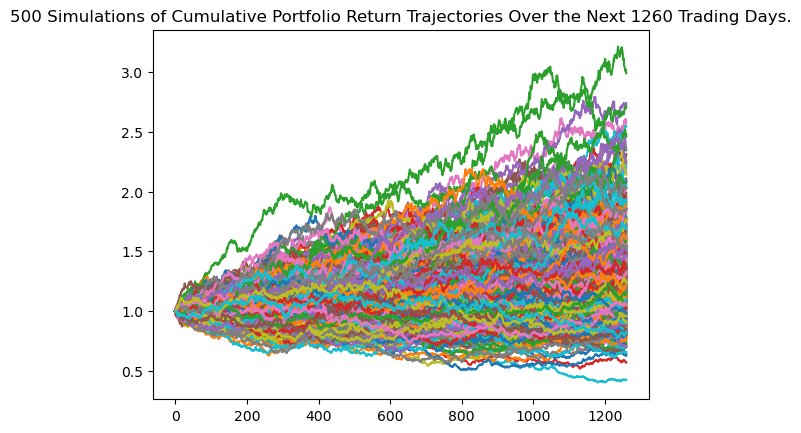

In [36]:
# Plot simulation outcomes
MC_5yr.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

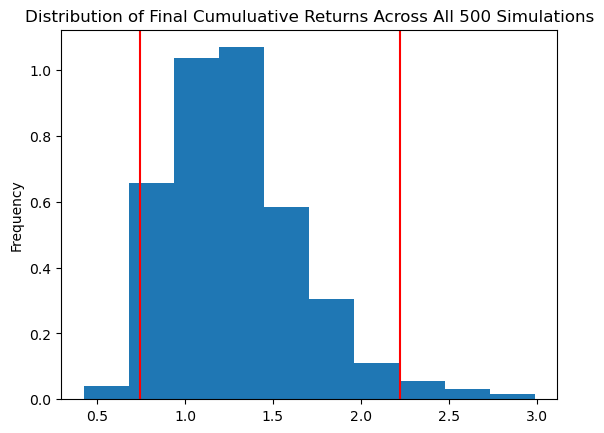

In [37]:
# Plot probability distribution and confidence intervals
MC_5yr.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_5yr_stats = MC_5yr.summarize_cumulative_return()

# Print summary statistics
print(MC_5yr_stats)

count           500.000000
mean              1.292427
std               0.378067
min               0.425650
25%               1.022383
50%               1.247024
75%               1.482928
max               2.988305
95% CI Lower      0.744990
95% CI Upper      2.224450
Name: 1260, dtype: float64


In [39]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MC_5yr_stats[8]*initial_investment,2)
ci_upper_five = round(MC_5yr_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $14899.79 and $44489.0


### Ten Years Retirement Option

In [40]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr = MCSimulation(
    portfolio_data= df_stock_data,
    weights= [.40,.60],
    num_simulation= 500,
    num_trading_days= 252*10
)

In [41]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Elias\Desktop\Bootcamp\Challenge-5-API\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006314,1.002554,0.985853,0.998887,0.999291,0.989324,0.999415,0.991482,1.001783,0.998790,...,0.995095,1.007542,0.992783,0.995905,1.003249,1.012934,1.002552,1.004206,1.017802,0.975981
2,1.001751,1.015604,0.982759,1.004243,1.009731,0.990082,1.016840,0.996909,1.005101,1.000125,...,0.993993,1.011633,0.982120,1.002687,1.006155,1.019581,1.012657,0.997063,1.020548,0.971328
3,0.998349,1.013532,0.976938,1.017676,1.017781,0.991428,1.008643,1.004376,0.996057,1.006375,...,0.992851,1.015382,0.986179,1.006745,1.004090,1.004109,1.026866,1.000092,1.025701,0.968019
4,0.997173,1.010582,0.987020,1.021307,1.018782,0.998364,1.004596,1.011698,0.990146,1.014053,...,0.987527,1.011301,0.986104,1.004741,0.997443,1.008182,1.027915,0.994976,1.026210,0.962861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.237696,1.784723,1.328020,1.387005,2.290831,1.365524,1.899726,1.551841,1.756240,1.433197,...,1.222630,1.950841,1.400070,5.222694,1.259073,1.297262,2.077317,1.037678,2.000118,1.614476
2517,1.246787,1.788509,1.325863,1.351269,2.287956,1.354982,1.876333,1.563276,1.762622,1.435187,...,1.219373,1.956912,1.408073,5.256815,1.243946,1.281310,2.091494,1.043630,2.026569,1.610722
2518,1.244069,1.772042,1.331440,1.346804,2.302137,1.354003,1.892692,1.564910,1.751821,1.433439,...,1.228094,1.976093,1.423786,5.210373,1.247444,1.284096,2.072477,1.052154,2.031920,1.614835
2519,1.246083,1.814254,1.342320,1.339688,2.278484,1.360447,1.913712,1.553265,1.745805,1.443959,...,1.216229,2.006844,1.418357,5.299250,1.246308,1.289743,2.091589,1.057435,2.044822,1.614065


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

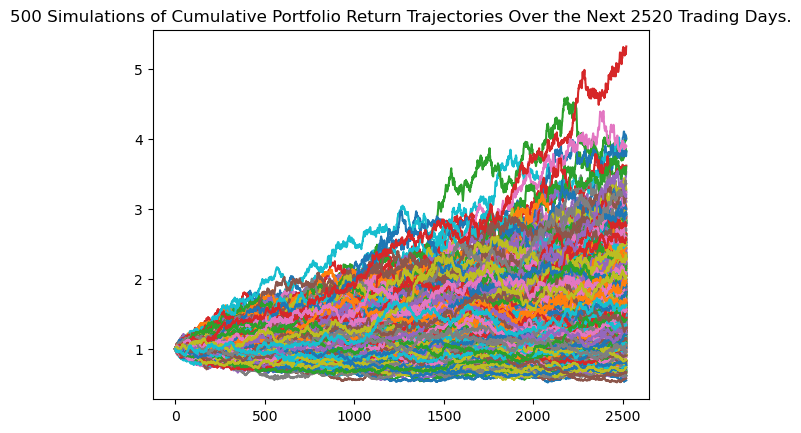

In [42]:
# Plot simulation outcomes
MC_10yr.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

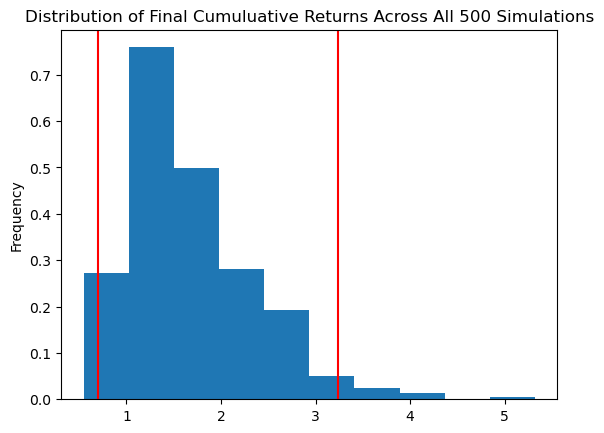

In [43]:
# Plot probability distribution and confidence intervals
MC_10yr.plot_distribution()

In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_10yr_stats = MC_10yr.summarize_cumulative_return()

# Print summary statistics
print(MC_10yr_stats)

count           500.000000
mean              1.681142
std               0.672857
min               0.550720
25%               1.239101
50%               1.528457
75%               2.046303
max               5.320169
95% CI Lower      0.699079
95% CI Upper      3.240921
Name: 2520, dtype: float64


In [46]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MC_10yr_stats[8]*initial_investment,2)
ci_upper_ten = round(MC_10yr_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $13981.59 and $64818.42
